# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Below, we created a plot with a clearly non-linear shape.

- plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree.
- print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def pol(x):
    return x * np.cos(x)

In [56]:
x = np.linspace(0, 12, 100)
x

array([ 0.        ,  0.12121212,  0.24242424,  0.36363636,  0.48484848,
        0.60606061,  0.72727273,  0.84848485,  0.96969697,  1.09090909,
        1.21212121,  1.33333333,  1.45454545,  1.57575758,  1.6969697 ,
        1.81818182,  1.93939394,  2.06060606,  2.18181818,  2.3030303 ,
        2.42424242,  2.54545455,  2.66666667,  2.78787879,  2.90909091,
        3.03030303,  3.15151515,  3.27272727,  3.39393939,  3.51515152,
        3.63636364,  3.75757576,  3.87878788,  4.        ,  4.12121212,
        4.24242424,  4.36363636,  4.48484848,  4.60606061,  4.72727273,
        4.84848485,  4.96969697,  5.09090909,  5.21212121,  5.33333333,
        5.45454545,  5.57575758,  5.6969697 ,  5.81818182,  5.93939394,
        6.06060606,  6.18181818,  6.3030303 ,  6.42424242,  6.54545455,
        6.66666667,  6.78787879,  6.90909091,  7.03030303,  7.15151515,
        7.27272727,  7.39393939,  7.51515152,  7.63636364,  7.75757576,
        7.87878788,  8.        ,  8.12121212,  8.24242424,  8.36

In [57]:
rng = np.random.RandomState(1234)

In [6]:
print(rng)

In [58]:
rng.shuffle(x)
rng

In [59]:
x = np.sort(x[:25])
x

array([ 0.12121212,  1.09090909,  3.27272727,  3.51515152,  4.        ,
        4.24242424,  4.72727273,  4.84848485,  5.09090909,  6.18181818,
        6.78787879,  7.15151515,  7.39393939,  7.63636364,  8.24242424,
        8.60606061,  9.09090909,  9.81818182,  9.93939394, 10.3030303 ,
       10.54545455, 10.66666667, 11.39393939, 11.63636364, 11.87878788])

In [60]:
y = pol(x) + np.random.randn(25)*2
y

array([ -2.65381915,  -0.95763208,  -3.03847169,  -2.51194871,
        -5.38409527,  -2.20518314,   1.24156135,  -0.88756522,
         3.04074168,   7.01988399,   5.19377838,   5.65242305,
         4.38708692,   2.25504067,  -5.59324658,  -6.43528691,
        -7.19675496, -10.93086649, -10.03753199,  -9.33936254,
        -6.18620492,  -4.53689121,   6.11575907,   6.58555285,
         8.86732219])

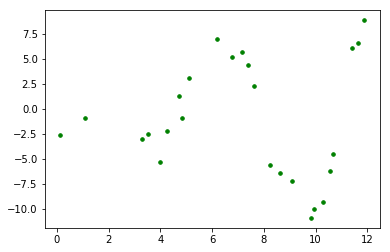

In [61]:
plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

## Solution

In [ ]:
x

In [ ]:
y

In [62]:
x = x.reshape(-1, 1)
x

array([[ 0.12121212],
       [ 1.09090909],
       [ 3.27272727],
       [ 3.51515152],
       [ 4.        ],
       [ 4.24242424],
       [ 4.72727273],
       [ 4.84848485],
       [ 5.09090909],
       [ 6.18181818],
       [ 6.78787879],
       [ 7.15151515],
       [ 7.39393939],
       [ 7.63636364],
       [ 8.24242424],
       [ 8.60606061],
       [ 9.09090909],
       [ 9.81818182],
       [ 9.93939394],
       [10.3030303 ],
       [10.54545455],
       [10.66666667],
       [11.39393939],
       [11.63636364],
       [11.87878788]])

In [81]:
from sklearn.preprocessing import PolynomialFeatures

#transform x to the 2nd, 3rd, 4th degree
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly4 = PolynomialFeatures(4)
x_2nd = poly2.fit_transform(x)
x_3rd = poly3.fit_transform(x)
x_4th = poly4.fit_transform(x)

In [82]:
from sklearn.linear_model import LinearRegression

#build regressions for each transformed feature with y
#"reg poly"
reg2 = LinearRegression().fit(x_2nd, y)
reg3 = LinearRegression().fit(x_3rd, y)
reg4 = LinearRegression().fit(x_4th, y)

In [83]:
#create predicted values (Ys) for each reg model
#use these later for MSE and R2
#"predict X"
pred2 = reg2.predict(x_2nd)
pred3 = reg3.predict(x_3rd)
pred4 = reg4.predict(x_4th)

In [27]:
len(pred2)

25

In [43]:
import pandas as pd


In [84]:
#Construct a set of points that roughly follows the curve 
#captured in the "polys"
#x linspace
x_lin2 = pd.DataFrame(np.linspace(0, 12, 50), columns = ['x'])
#x linspace fin
x_fin2 = poly2.fit_transform(x_lin2)
#y poly pred
y_fin2 = reg2.predict(x_fin2)

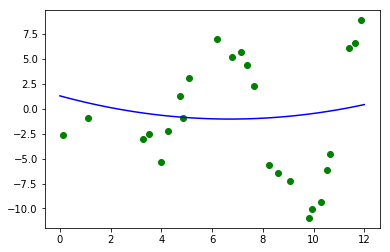

In [85]:
#plot model for 2nd degree
plt.scatter(x, y, color ="green")
plt.plot(x_lin, y_fin, color = "blue")

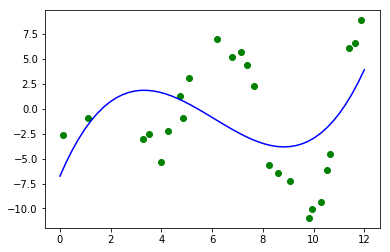

In [86]:
#plot model for 3rd degree
x_lin3 = pd.DataFrame(np.linspace(0, 12, 50), columns = ['x'])
#x linspace fin
x_fin3 = poly3.fit_transform(x_lin3)
#y poly pred
y_fin3 = reg3.predict(x_fin3)

plt.scatter(x, y, color ="green")
plt.plot(x_lin3, y_fin3, color = "blue")

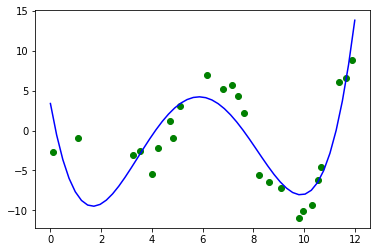

In [88]:
#plot model for 4th degree
x_lin4 = pd.DataFrame(np.linspace(0, 12, 50), columns = ['x'])
#x linspace fin
x_fin4 = poly4.fit_transform(x_lin4)
#y poly pred
y_fin4 = reg4.predict(x_fin4)

plt.scatter(x, y, color ="green")
plt.plot(x_lin4, y_fin4, color = "blue")

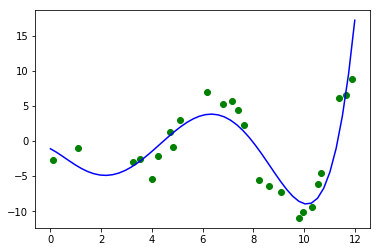

In [89]:
#How about a 5th?

poly5 = PolynomialFeatures(5)
x_5th = poly5.fit_transform(x)
reg5 = LinearRegression().fit(x_5th, y)
pred5 = reg5.predict(x_5th)

#plot model for 5th degree
x_lin5 = pd.DataFrame(np.linspace(0, 12, 50), columns = ['x'])
#x linspace fin
x_fin5 = poly5.fit_transform(x_lin5)
#y poly pred
y_fin5 = reg5.predict(x_fin5)

plt.scatter(x, y, color ="green")
plt.plot(x_lin5, y_fin5, color = "blue")

In [90]:
#Find MSE and R-squared score for 2nd degree
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y, pred2))
print(r2_score(y, pred2))

32.850335136015005
9.928035984696493e-05


In [91]:
#Find MSE and R-squared score for 3rd degree

print(mean_squared_error(y, pred3))
print(r2_score(y, pred3))

27.20373332462711
0.17197092767641242


In [92]:
#Find MSE and R-squared score for 4th degree

print(mean_squared_error(y, pred4))
print(r2_score(y, pred4))

8.478774881105032
0.7419224774973723


In [93]:
#Find MSE and R-squared score for 5th degree

print(mean_squared_error(y, pred5))
print(r2_score(y, pred5))

6.034648889439147
0.8163169495123199


## Summary

Great! You now know how to include polynomials in your linear model!